File exists


/var/folders/d5/7y4f1s550h1gr7jtvhtm9dp80000gn/T/ipykernel_3546/1800595565.py:21: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_clean['From Date'] = pd.to_datetime(df_clean['From Date'], errors='coerce', infer_datetime_format=True)
/var/folders/d5/7y4f1s550h1gr7jtvhtm9dp80000gn/T/ipykernel_3546/1800595565.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['From Date'] = pd.to_datetime(df_clean['From Date'], errors='coerce', infer_datetime_format=True)


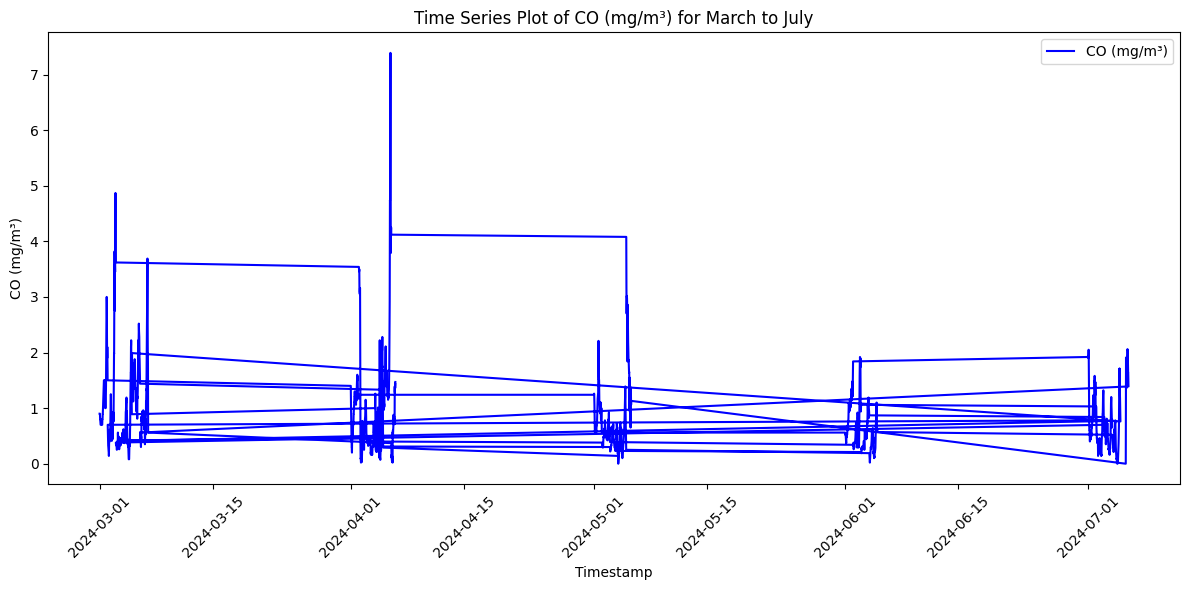

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the dataset
file_path = '/Users/jayarajupakki/Documents/Phd/Project_Landfill_fires/Data/2024/Ghazipur/Patparganj_2024.XLSX'

if os.path.isfile(file_path):
    print("File exists")
else:
    print("File does not exist")

# Load the Excel file
df = pd.read_excel(file_path, sheet_name=1)

# Drop rows where 'From Date' or 'CO' is NaN
df_clean = df.dropna(subset=['From Date', 'CO'])

# Convert 'From Date' to datetime
# Use infer_datetime_format=True to handle mixed formats automatically
df_clean['From Date'] = pd.to_datetime(df_clean['From Date'], errors='coerce', infer_datetime_format=True)

# Check for any rows that failed conversion
if df_clean['From Date'].isna().any():
    print("Warning: Some dates could not be parsed. They have been set to NaT.")

# Filter for March, April, May, June, and July
df_clean = df_clean[
    df_clean['From Date'].dt.month.isin([3, 4, 5, 6, 7])
]

# Extract 'From Date' and 'CO' columns
time_clean = df_clean['From Date']
CO_clean = df_clean['CO']

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(time_clean, CO_clean, label='CO (mg/m³)', color='b')
plt.xlabel('Timestamp')
plt.ylabel('CO (mg/m³)')
plt.title('Time Series Plot of CO (mg/m³) for March to July')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


In [13]:
df.keys()

Index(['From Date', 'To Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'SO2', 'CO', 'Ozone', 'Benzene', 'Toluene', 'Temp', 'RH', 'WS', 'WD',
       'SR', 'BP', 'VWS', 'AT', 'RF'],
      dtype='object')

/var/folders/d5/7y4f1s550h1gr7jtvhtm9dp80000gn/T/ipykernel_3546/1531725753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['From Date'] = pd.to_datetime(df_clean['From Date'], format='%d-%m-%Y %H:%M', errors='coerce')
/var/folders/d5/7y4f1s550h1gr7jtvhtm9dp80000gn/T/ipykernel_3546/1531725753.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Hour'] = df_filtered['From Date'].dt.hour
/var/folders/d5/7y4f1s550h1gr7jtvhtm9dp80000gn/T/ipykernel_3546/1531725753.py:36: SettingWithCopy

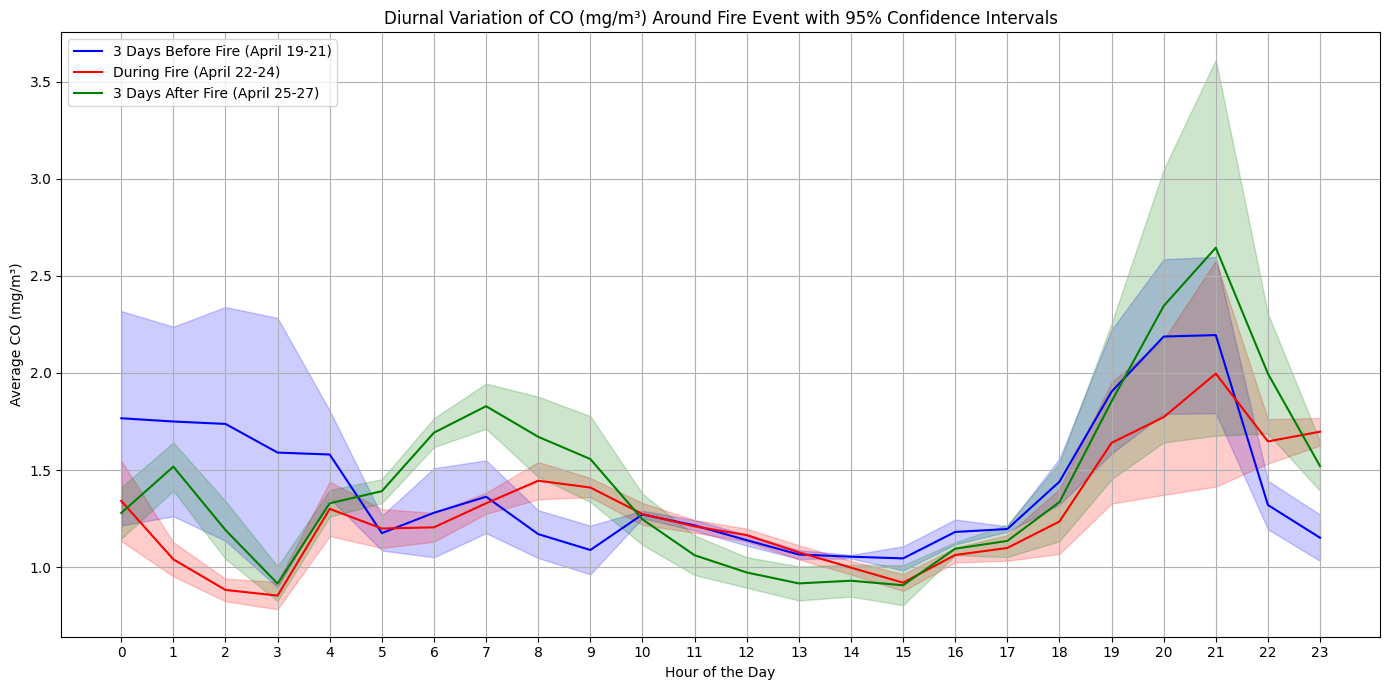

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/Users/jayarajupakki/Documents/Phd/Project_Landfill_fires/Data/2024/Ghazipur/Patparganj_2024.XLSX'

# Load the Excel file
df = pd.read_excel(file_path, sheet_name=1)

# Drop rows where 'From Date' or 'CO' is NaN
df_clean = df.dropna(subset=['From Date', 'CO'])

# Convert 'From Date' to datetime
# Update format based on the actual date format in your data
df_clean['From Date'] = pd.to_datetime(df_clean['From Date'], format='%d-%m-%Y %H:%M', errors='coerce')

# Drop rows where conversion failed
df_clean = df_clean.dropna(subset=['From Date'])

# Define the new date ranges
pre_fire_start = '2024-04-19'
pre_fire_end = '2024-04-21'
fire_start = '2024-04-22'
fire_end = '2024-04-24'
post_fire_start = '2024-04-25'
post_fire_end = '2024-04-27'

# Filter the data for each date range
df_pre_fire = df_clean[(df_clean['From Date'] >= pre_fire_start) & (df_clean['From Date'] <= pre_fire_end)]
df_fire = df_clean[(df_clean['From Date'] >= fire_start) & (df_clean['From Date'] <= fire_end)]
df_post_fire = df_clean[(df_clean['From Date'] >= post_fire_start) & (df_clean['From Date'] <= post_fire_end)]

# Add a column for hour of the day
for df_filtered in [df_pre_fire, df_fire, df_post_fire]:
    df_filtered['Hour'] = df_filtered['From Date'].dt.hour
    df_filtered['Date'] = df_filtered['From Date'].dt.date

# Compute mean, standard error, and confidence interval for each hour
def compute_ci(df_filtered):
    grouped = df_filtered.groupby('Hour')['CO']
    mean = grouped.mean()
    std_err = grouped.sem()
    ci = 1.96 * std_err  # 95% CI
    return mean, ci

mean_pre_fire, ci_pre_fire = compute_ci(df_pre_fire)
mean_fire, ci_fire = compute_ci(df_fire)
mean_post_fire, ci_post_fire = compute_ci(df_post_fire)

# Plotting
plt.figure(figsize=(14, 7))

# Plot for pre-fire, fire, and post-fire periods with confidence intervals
plt.plot(mean_pre_fire.index, mean_pre_fire, label='3 Days Before Fire (April 19-21)', color='b')
plt.fill_between(mean_pre_fire.index, mean_pre_fire - ci_pre_fire, mean_pre_fire + ci_pre_fire, color='b', alpha=0.2)

plt.plot(mean_fire.index, mean_fire, label='During Fire (April 22-24)', color='r')
plt.fill_between(mean_fire.index, mean_fire - ci_fire, mean_fire + ci_fire, color='r', alpha=0.2)

plt.plot(mean_post_fire.index, mean_post_fire, label='3 Days After Fire (April 25-27)', color='g')
plt.fill_between(mean_post_fire.index, mean_post_fire - ci_post_fire, mean_post_fire + ci_post_fire, color='g', alpha=0.2)

plt.xlabel('Hour of the Day')
plt.ylabel('Average CO (mg/m³)')
plt.title('Diurnal Variation of CO (mg/m³) Around Fire Event with 95% Confidence Intervals')
plt.xticks(range(24))  # Show each hour on x-axis
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/d5/7y4f1s550h1gr7jtvhtm9dp80000gn/T/ipykernel_3546/1477996350.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['From Date'] = pd.to_datetime(df_clean['From Date'], format='%d-%m-%Y %H:%M', errors='coerce')
/var/folders/d5/7y4f1s550h1gr7jtvhtm9dp80000gn/T/ipykernel_3546/1477996350.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Hour'] = df_filtered['From Date'].dt.hour
/var/folders/d5/7y4f1s550h1gr7jtvhtm9dp80000gn/T/ipykernel_3546/1477996350.py:36: SettingWithCopy

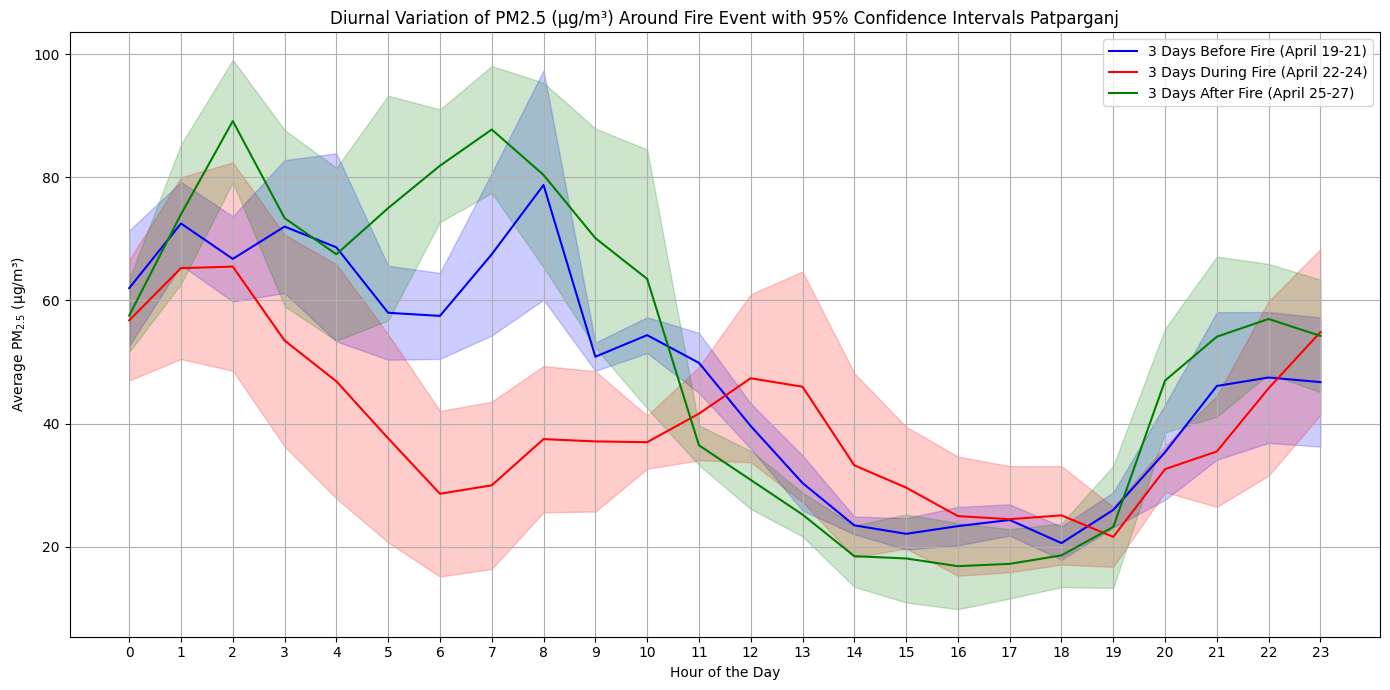

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/Users/jayarajupakki/Documents/Phd/Project_Landfill_fires/Data/2024/Ghazipur/Patparganj_2024.XLSX'

# Load the Excel file
df = pd.read_excel(file_path, sheet_name=1)

# Drop rows where 'From Date' or 'CO' is NaN
df_clean = df.dropna(subset=['From Date', 'PM2.5'])

# Convert 'From Date' to datetime
# Update format based on the actual date format in your data
df_clean['From Date'] = pd.to_datetime(df_clean['From Date'], format='%d-%m-%Y %H:%M', errors='coerce')

# Drop rows where conversion failed
df_clean = df_clean.dropna(subset=['From Date'])

# Define the new date ranges
pre_fire_start = '2024-04-19'
pre_fire_end = '2024-04-21'
fire_start = '2024-04-22'
fire_end = '2024-04-24'
post_fire_start = '2024-04-25'
post_fire_end = '2024-04-27'

# Filter the data for each date range
df_pre_fire = df_clean[(df_clean['From Date'] >= pre_fire_start) & (df_clean['From Date'] <= pre_fire_end)]
df_fire = df_clean[(df_clean['From Date'] >= fire_start) & (df_clean['From Date'] <= fire_end)]
df_post_fire = df_clean[(df_clean['From Date'] >= post_fire_start) & (df_clean['From Date'] <= post_fire_end)]

# Add a column for hour of the day
for df_filtered in [df_pre_fire, df_fire, df_post_fire]:
    df_filtered['Hour'] = df_filtered['From Date'].dt.hour
    df_filtered['Date'] = df_filtered['From Date'].dt.date

# Compute mean, standard error, and confidence interval for each hour
def compute_ci(df_filtered):
    grouped = df_filtered.groupby('Hour')['PM2.5']
    mean = grouped.mean()
    std_err = grouped.sem()
    ci = 1.96 * std_err  # 95% CI
    return mean, ci

mean_pre_fire, ci_pre_fire = compute_ci(df_pre_fire)
mean_fire, ci_fire = compute_ci(df_fire)
mean_post_fire, ci_post_fire = compute_ci(df_post_fire)

# Plotting
plt.figure(figsize=(14, 7))

# Plot for pre-fire, fire, and post-fire periods with confidence intervals
plt.plot(mean_pre_fire.index, mean_pre_fire, label='3 Days Before Fire (April 19-21)', color='b')
plt.fill_between(mean_pre_fire.index, mean_pre_fire - ci_pre_fire, mean_pre_fire + ci_pre_fire, color='b', alpha=0.2)

plt.plot(mean_fire.index, mean_fire, label='3 Days During Fire (April 22-24)', color='r')
plt.fill_between(mean_fire.index, mean_fire - ci_fire, mean_fire + ci_fire, color='r', alpha=0.2)

plt.plot(mean_post_fire.index, mean_post_fire, label='3 Days After Fire (April 25-27)', color='g')
plt.fill_between(mean_post_fire.index, mean_post_fire - ci_post_fire, mean_post_fire + ci_post_fire, color='g', alpha=0.2)

plt.xlabel('Hour of the Day')
plt.ylabel('Average PM$_{2.5}$ (µg/m³)')
plt.title('Diurnal Variation of PM2.5 (µg/m³) Around Fire Event with 95% Confidence Intervals Patparganj')
plt.xticks(range(24))  # Show each hour on x-axis
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [47]:
df_clean

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,...,Toluene,Temp,RH,WS,WD,SR,BP,VWS,AT,RF
0,2024-01-01 00:00:00,01-01-2024 00:15,164.0,295.0,14.0,51.3,38.7,36.5,3.2,1.00,...,1.8,NaN,81.4,0.6,256.9,52.4,995.0,NaN,10.1,0.0
1,2024-01-01 00:15:00,01-01-2024 00:30,164.0,295.0,7.9,50.4,33.2,36.2,3.0,1.00,...,1.6,NaN,81.7,0.7,333.9,52.4,994.8,NaN,10.1,0.0
2,2024-01-01 00:30:00,01-01-2024 00:45,164.0,295.0,4.1,42.8,26.1,35.9,2.9,0.90,...,1.6,NaN,81.7,1.0,352.3,52.2,994.8,NaN,10.0,0.0
3,2024-01-01 00:45:00,01-01-2024 01:00,182.0,328.0,9.7,49.9,34.5,36.0,2.8,0.90,...,1.9,NaN,81.7,2.1,2.0,52.4,994.8,NaN,10.0,0.0
4,2024-01-01 01:00:00,01-01-2024 01:15,182.0,328.0,10.4,46.3,33.2,36.8,3.3,0.90,...,2.0,NaN,81.6,1.1,346.5,52.8,994.8,NaN,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14924,2024-04-06 11:00:00,04-06-2024 11:15,95.0,354.0,6.2,41.4,27.1,31.9,15.5,1.40,...,2.7,NaN,41.0,4.2,105.0,344.0,977.0,NaN,37.0,0.0
14925,2024-04-06 11:15:00,04-06-2024 11:30,95.0,354.0,6.7,41.7,27.6,31.5,19.1,1.45,...,4.8,NaN,40.0,4.1,136.0,447.0,977.0,NaN,37.7,0.0
14926,2024-04-06 11:30:00,04-06-2024 11:45,95.0,354.0,7.3,42.0,28.3,33.7,13.5,1.36,...,4.1,NaN,39.0,2.7,130.0,428.0,977.0,NaN,38.5,0.0
14927,2024-04-06 11:45:00,04-06-2024 12:00,95.0,354.0,6.5,39.3,26.1,36.8,18.7,1.45,...,2.6,NaN,37.0,2.7,180.0,591.0,977.0,NaN,39.3,0.0


In [51]:
df_clean['From Date'] = pd.to_datetime(df_clean['From Date'], errors='coerce')


/var/folders/d5/7y4f1s550h1gr7jtvhtm9dp80000gn/T/ipykernel_3546/3806033155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['From Date'] = pd.to_datetime(df_clean['From Date'], errors='coerce')


In [52]:
df_clean

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,...,Toluene,Temp,RH,WS,WD,SR,BP,VWS,AT,RF
0,2024-01-01 00:00:00,01-01-2024 00:15,164.0,295.0,14.0,51.3,38.7,36.5,3.2,1.00,...,1.8,NaN,81.4,0.6,256.9,52.4,995.0,NaN,10.1,0.0
1,2024-01-01 00:15:00,01-01-2024 00:30,164.0,295.0,7.9,50.4,33.2,36.2,3.0,1.00,...,1.6,NaN,81.7,0.7,333.9,52.4,994.8,NaN,10.1,0.0
2,2024-01-01 00:30:00,01-01-2024 00:45,164.0,295.0,4.1,42.8,26.1,35.9,2.9,0.90,...,1.6,NaN,81.7,1.0,352.3,52.2,994.8,NaN,10.0,0.0
3,2024-01-01 00:45:00,01-01-2024 01:00,182.0,328.0,9.7,49.9,34.5,36.0,2.8,0.90,...,1.9,NaN,81.7,2.1,2.0,52.4,994.8,NaN,10.0,0.0
4,2024-01-01 01:00:00,01-01-2024 01:15,182.0,328.0,10.4,46.3,33.2,36.8,3.3,0.90,...,2.0,NaN,81.6,1.1,346.5,52.8,994.8,NaN,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14924,2024-04-06 11:00:00,04-06-2024 11:15,95.0,354.0,6.2,41.4,27.1,31.9,15.5,1.40,...,2.7,NaN,41.0,4.2,105.0,344.0,977.0,NaN,37.0,0.0
14925,2024-04-06 11:15:00,04-06-2024 11:30,95.0,354.0,6.7,41.7,27.6,31.5,19.1,1.45,...,4.8,NaN,40.0,4.1,136.0,447.0,977.0,NaN,37.7,0.0
14926,2024-04-06 11:30:00,04-06-2024 11:45,95.0,354.0,7.3,42.0,28.3,33.7,13.5,1.36,...,4.1,NaN,39.0,2.7,130.0,428.0,977.0,NaN,38.5,0.0
14927,2024-04-06 11:45:00,04-06-2024 12:00,95.0,354.0,6.5,39.3,26.1,36.8,18.7,1.45,...,2.6,NaN,37.0,2.7,180.0,591.0,977.0,NaN,39.3,0.0


In [74]:
import pandas as pd

# Load the dataset
file_path = '/Users/jayarajupakki/Documents/Phd/Project_Landfill_fires/Data/2024/Ghazipur/Patparganj_2024.XLSX'

if os.path.isfile(file_path):
    print("File exists")
else:
    print("File does not exist")

# Load the Excel file
df = pd.read_excel(file_path, sheet_name=1)

# Drop rows where 'From Date' is NaN
df_clean = df.dropna(subset=['From Date'])

# Convert 'From Date' to datetime
df_clean['From Date'] = pd.to_datetime(df_clean['From Date'], errors='coerce')

# Define the specific date and time to search for
specific_datetime = pd.Timestamp('2024-04-20 01:30:00')

# Filter the DataFrame to find rows with the specific date and time
specific_row = df_clean[df_clean['From Date'] == specific_datetime]

# Display the result
print(specific_row)


File exists
Empty DataFrame
Columns: [From Date, To Date, PM2.5, PM10, NO, NO2, NOx, NH3, SO2, CO, Ozone, Benzene, Toluene, Temp, RH, WS, WD, SR, BP, VWS, AT, RF]
Index: []

[0 rows x 22 columns]


In [76]:
import pandas as pd

# Load the dataset
file_path = '/Users/jayarajupakki/Documents/Phd/Project_Landfill_fires/Data/2024/Ghazipur/Patparganj_2024.XLSX'

if os.path.isfile(file_path):
    print("File exists")
else:
    print("File does not exist")

# Load the Excel file
df = pd.read_excel(file_path, sheet_name=1)

# Drop rows where 'From Date' is NaN
df_clean = df.dropna(subset=['From Date'])

# Convert 'From Date' to datetime
df_clean['From Date'] = pd.to_datetime(df_clean['From Date'], errors='coerce')

# Print the row with index 10754
specific_row = df_clean.iloc[10751]

# Display the result
print(specific_row)


File exists
From Date                 NaT
To Date      22-04-2024 00:00
PM2.5                    44.0
PM10                    186.0
NO                        1.3
NO2                      36.7
NOx                      20.6
NH3                      31.5
SO2                       5.2
CO                       1.41
Ozone                    49.8
Benzene                   0.5
Toluene                   3.6
Temp                      NaN
RH                       36.0
WS                        1.4
WD                        2.0
SR                        6.0
BP                      982.0
VWS                       NaN
AT                       28.2
RF                        0.0
Name: 10751, dtype: object


In [88]:
import pandas as pd

# Load the dataset
file_path = '/Users/jayarajupakki/Documents/Phd/Project_Landfill_fires/Data/2024/Ghazipur/Patparganj_2024.XLSX'

if os.path.isfile(file_path):
    print("File exists")
else:
    print("File does not exist")

# Load the Excel file
df = pd.read_excel(file_path, sheet_name=1)

# Drop rows where 'From Date' is NaN
df_clean = df.dropna(subset=['From Date'])

# Convert 'From Date' to datetime
df_clean['From Date'] = pd.to_datetime(df_clean['From Date'], errors='coerce')

# Print the row with index 10754
specific_row = df_clean.iloc[11039]

# Display the result
print(specific_row)


File exists
From Date                 NaT
To Date      25-04-2024 00:00
PM2.5                    56.0
PM10                    246.0
NO                        1.2
NO2                      46.5
NOx                      25.7
NH3                      26.8
SO2                       5.2
CO                       1.43
Ozone                    42.2
Benzene                   0.8
Toluene                   7.7
Temp                      NaN
RH                       36.0
WS                        0.4
WD                        2.0
SR                        6.0
BP                      983.0
VWS                       NaN
AT                       27.5
RF                        0.0
Name: 11039, dtype: object


File exists


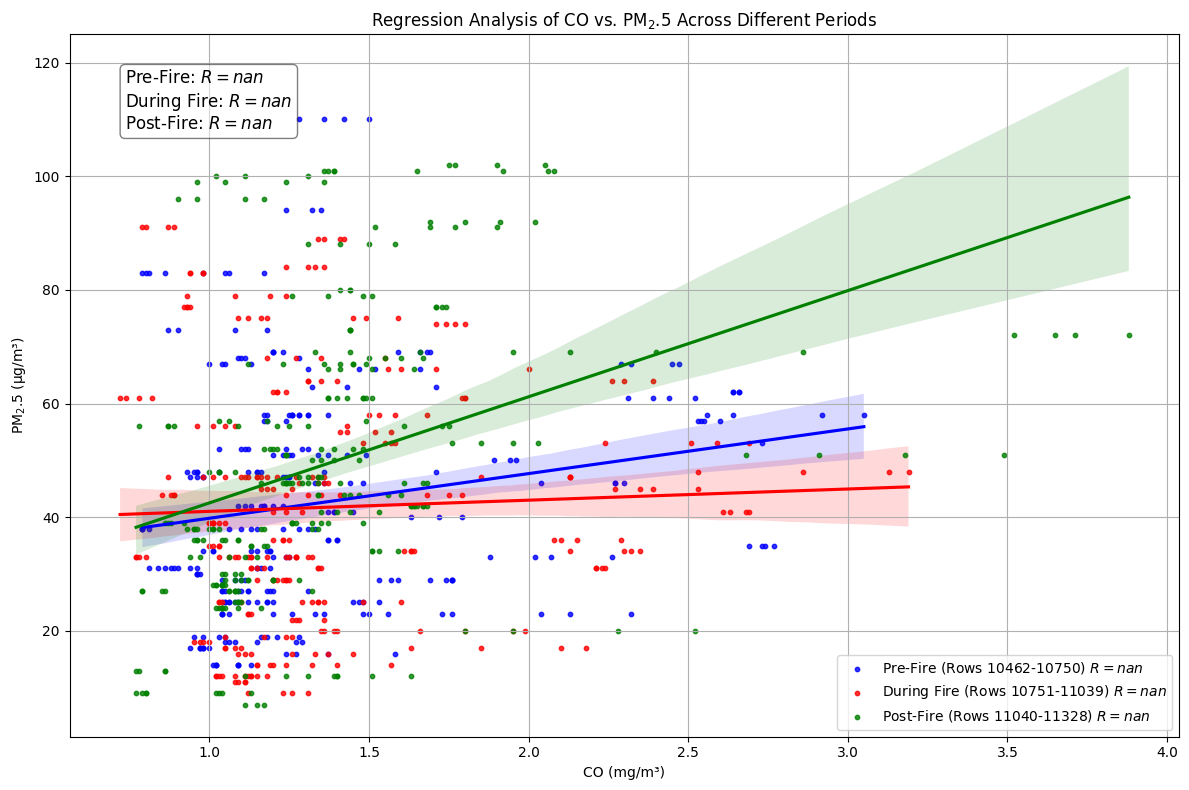

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import linregress

# Load the dataset
file_path = '/Users/jayarajupakki/Documents/Phd/Project_Landfill_fires/Data/2024/Ghazipur/Patparganj_2024.XLSX'

if os.path.isfile(file_path):
    print("File exists")
else:
    print("File does not exist")

# Load the Excel file
df = pd.read_excel(file_path, sheet_name=1)

# Drop rows where 'From Date' is NaN
df_clean = df.dropna(subset=['From Date'])

# Convert 'From Date' to datetime
df_clean['From Date'] = pd.to_datetime(df_clean['From Date'], errors='coerce')

# Define indices for the 'During Fire' period
start_during_fire_index = 10751
end_during_fire_index = 11039

# Determine the number of rows in the 'During Fire' period
num_rows_during_fire = end_during_fire_index - start_during_fire_index + 1

# Extract the 'During Fire' data
df_during_fire = df_clean.iloc[start_during_fire_index:end_during_fire_index + 1].copy()

# Extract Pre-Fire and Post-Fire data with the same number of rows as 'During Fire'
start_pre_fire_index = start_during_fire_index - num_rows_during_fire
end_pre_fire_index = start_during_fire_index - 1

start_post_fire_index = end_during_fire_index + 1
end_post_fire_index = end_during_fire_index + num_rows_during_fire

# Ensure indices are within the bounds of the DataFrame
start_pre_fire_index = max(start_pre_fire_index, 0)
end_post_fire_index = min(end_post_fire_index, len(df_clean) - 1)

# Extract Pre-Fire and Post-Fire data
df_pre_fire = df_clean.iloc[start_pre_fire_index:end_pre_fire_index + 1].copy()
df_post_fire = df_clean.iloc[start_post_fire_index:end_post_fire_index + 1].copy()

# Function to compute and return regression line and Pearson correlation coefficient
def compute_regression_params(df):
    if len(df) == 0:
        return None, None, None
    slope, intercept, r_value, p_value, std_err = linregress(df['CO'], df['PM2.5'])
    return slope, intercept, r_value

# Compute regression parameters and R values for each period
slope_pre_fire, intercept_pre_fire, r_pre_fire = compute_regression_params(df_pre_fire)
slope_during_fire, intercept_during_fire, r_during_fire = compute_regression_params(df_during_fire)
slope_post_fire, intercept_post_fire, r_post_fire = compute_regression_params(df_post_fire)

# Plotting
plt.figure(figsize=(12, 8))

# Plot the regression lines for each period with scatter points
if not df_pre_fire.empty:
    sns.regplot(x='CO', y='PM2.5', data=df_pre_fire,
                scatter_kws={'s':10, 'color':'blue'}, line_kws={'color':'blue'}, label=f'Pre-Fire (Rows {start_pre_fire_index}-{end_pre_fire_index}) $R = {r_pre_fire:.2f}$')
if not df_during_fire.empty:
    sns.regplot(x='CO', y='PM2.5', data=df_during_fire,
                scatter_kws={'s':10, 'color':'red'}, line_kws={'color':'red'}, label=f'During Fire (Rows {start_during_fire_index}-{end_during_fire_index}) $R = {r_during_fire:.2f}$')
if not df_post_fire.empty:
    sns.regplot(x='CO', y='PM2.5', data=df_post_fire,
                scatter_kws={'s':10, 'color':'green'}, line_kws={'color':'green'}, label=f'Post-Fire (Rows {start_post_fire_index}-{end_post_fire_index}) $R = {r_post_fire:.2f}$')

# Adding titles and labels
plt.xlabel('CO (mg/m³)')
plt.ylabel('PM$_2.5$ (µg/m³)')
plt.title('Regression Analysis of CO vs. PM$_2.5$ Across Different Periods')
plt.grid(True)

# Display Pearson correlation coefficients in a single box
textstr = '\n'.join((
    f'Pre-Fire: $R = {r_pre_fire:.2f}$' if r_pre_fire is not None else 'Pre-Fire: Not enough data',
    f'During Fire: $R = {r_during_fire:.2f}$' if r_during_fire is not None else 'During Fire: Not enough data',
    f'Post-Fire: $R = {r_post_fire:.2f}$' if r_post_fire is not None else 'Post-Fire: Not enough data'))

# Add text box with R values and corresponding colors
plt.gca().text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
               verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5),
               ha='left', color='black')

# Create a custom legend to include R values with colors
plt.gca().legend()

plt.tight_layout()
plt.show()


File exists


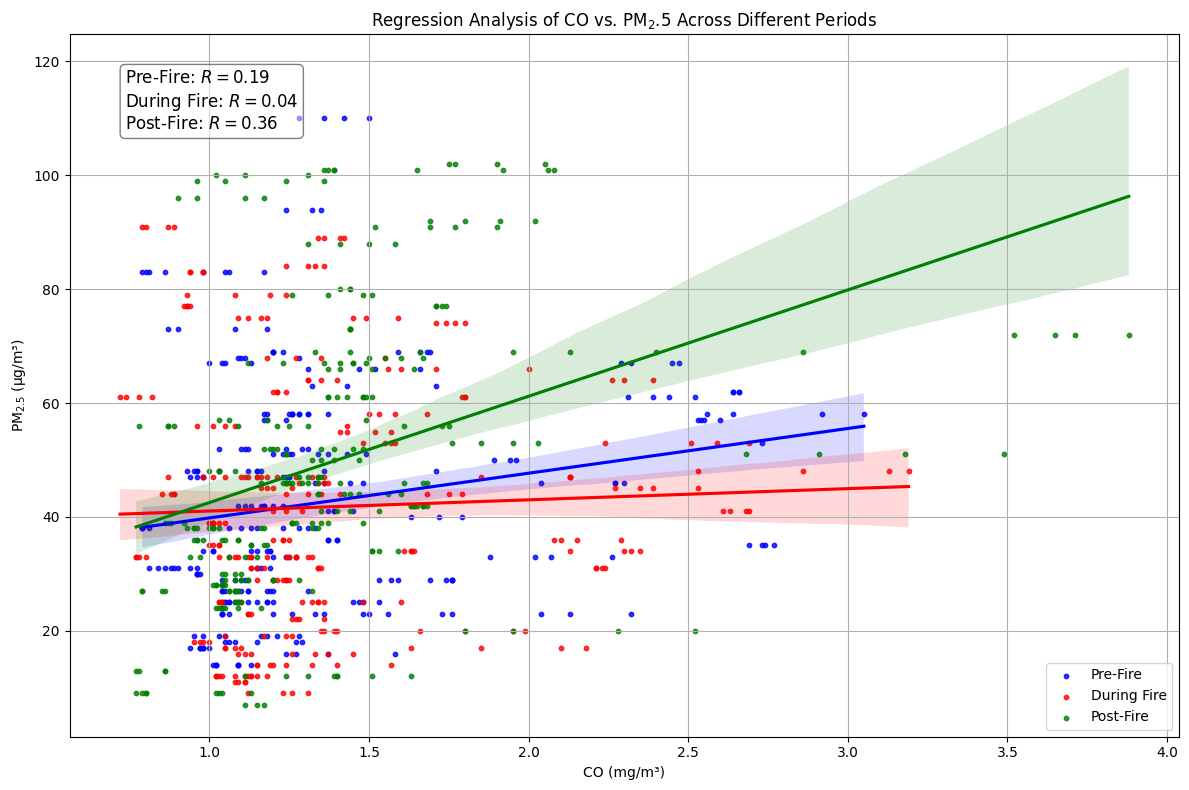

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import linregress

# Load the dataset
file_path = '/Users/jayarajupakki/Documents/Phd/Project_Landfill_fires/Data/2024/Ghazipur/Patparganj_2024.XLSX'

if os.path.isfile(file_path):
    print("File exists")
else:
    print("File does not exist")

# Load the Excel file
df = pd.read_excel(file_path, sheet_name=1)

# Drop rows where 'From Date' is NaN
df_clean = df.dropna(subset=['From Date'])

# Convert 'From Date' to datetime
df_clean['From Date'] = pd.to_datetime(df_clean['From Date'], errors='coerce')

# Define indices for the 'During Fire' period
start_during_fire_index = 10751
end_during_fire_index = 11039

# Determine the number of rows in the 'During Fire' period
num_rows_during_fire = end_during_fire_index - start_during_fire_index + 1

# Extract the 'During Fire' data
df_during_fire = df_clean.iloc[start_during_fire_index:end_during_fire_index + 1].copy()

# Extract Pre-Fire and Post-Fire data with the same number of rows as 'During Fire'
start_pre_fire_index = start_during_fire_index - num_rows_during_fire
end_pre_fire_index = start_during_fire_index - 1

start_post_fire_index = end_during_fire_index + 1
end_post_fire_index = end_during_fire_index + num_rows_during_fire

# Ensure indices are within the bounds of the DataFrame
start_pre_fire_index = max(start_pre_fire_index, 0)
end_post_fire_index = min(end_post_fire_index, len(df_clean) - 1)

# Extract Pre-Fire and Post-Fire data
df_pre_fire = df_clean.iloc[start_pre_fire_index:end_pre_fire_index + 1].copy()
df_post_fire = df_clean.iloc[start_post_fire_index:end_post_fire_index + 1].copy()

# Function to compute and return regression line and Pearson correlation coefficient
def compute_regression_params(df):
    if len(df) < 2 or df[['CO', 'PM2.5']].isna().any().any():
        return None, None, None
    slope, intercept, r_value, p_value, std_err = linregress(df['CO'].dropna(), df['PM2.5'].dropna())
    return slope, intercept, r_value

# Clean dataframes for missing values
df_pre_fire_clean = df_pre_fire.dropna(subset=['CO', 'PM2.5'])
df_during_fire_clean = df_during_fire.dropna(subset=['CO', 'PM2.5'])
df_post_fire_clean = df_post_fire.dropna(subset=['CO', 'PM2.5'])

# Compute regression parameters and R values for each period
slope_pre_fire, intercept_pre_fire, r_pre_fire = compute_regression_params(df_pre_fire_clean)
slope_during_fire, intercept_during_fire, r_during_fire = compute_regression_params(df_during_fire_clean)
slope_post_fire, intercept_post_fire, r_post_fire = compute_regression_params(df_post_fire_clean)

# Plotting
plt.figure(figsize=(12, 8))

# Plot the regression lines for each period with scatter points
if not df_pre_fire_clean.empty:
    sns.regplot(x='CO', y='PM2.5', data=df_pre_fire_clean,
                scatter_kws={'s':10, 'color':'blue'}, line_kws={'color':'blue'}, label=f'Pre-Fire')
if not df_during_fire_clean.empty:
    sns.regplot(x='CO', y='PM2.5', data=df_during_fire_clean,
                scatter_kws={'s':10, 'color':'red'}, line_kws={'color':'red'}, label=f'During Fire')
if not df_post_fire_clean.empty:
    sns.regplot(x='CO', y='PM2.5', data=df_post_fire_clean,
                scatter_kws={'s':10, 'color':'green'}, line_kws={'color':'green'}, label=f'Post-Fire')

# Adding titles and labels
plt.xlabel('CO (mg/m³)')
plt.ylabel('PM$_{2.5}$ (µg/m³)')
plt.title('Regression Analysis of CO vs. PM$_2.5$ Across Different Periods')
plt.grid(True)

# Display Pearson correlation coefficients in a single box
textstr = '\n'.join((
    f'Pre-Fire: $R = {r_pre_fire:.2f}$' if r_pre_fire is not None else 'Pre-Fire: Not enough data',
    f'During Fire: $R = {r_during_fire:.2f}$' if r_during_fire is not None else 'During Fire: Not enough data',
    f'Post-Fire: $R = {r_post_fire:.2f}$' if r_post_fire is not None else 'Post-Fire: Not enough data'))

# Add text box with R values and corresponding colors
plt.gca().text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
               verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5),
               ha='left', color='black')

# Create a custom legend to include R values with colors
plt.gca().legend()

plt.tight_layout()
plt.show()
